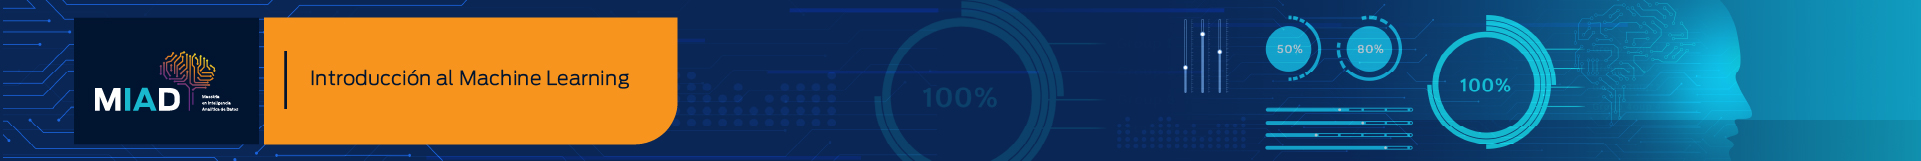

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-smarket

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Lectura de archivo fuente
df1 = pd.read_csv('./dataset-18213.csv')
df1.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
#Dimensiones originales de dataset
df1.shape

(1250, 9)

In [4]:
#Variables de dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


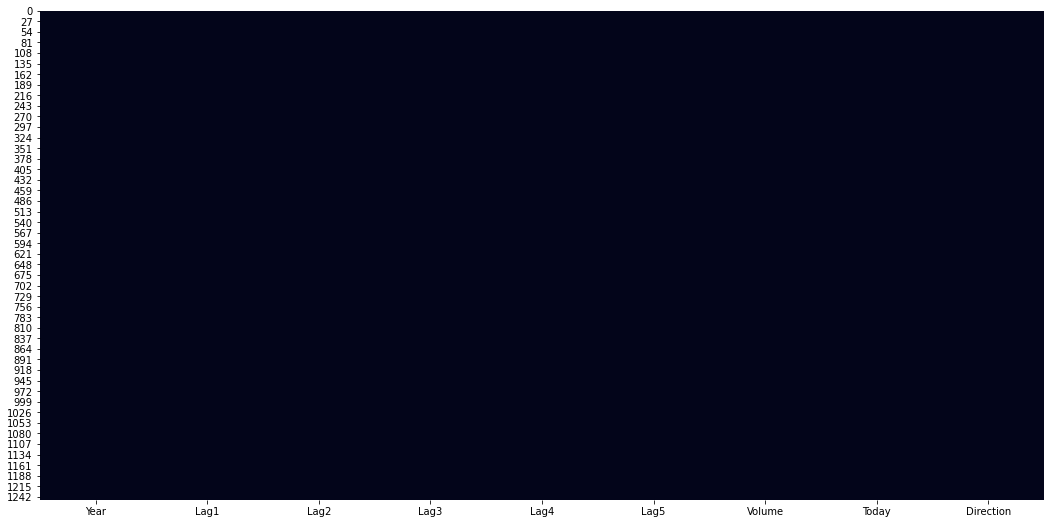

In [5]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [6]:
#Estadísticas descriptivas
for i, col in enumerate(df1.columns):
    print(df1[col].describe(), '\n')

count    1250.000000
mean     2003.016000
std         1.409018
min      2001.000000
25%      2002.000000
50%      2003.000000
75%      2004.000000
max      2005.000000
Name: Year, dtype: float64 

count    1250.000000
mean        0.003834
std         1.136299
min        -4.922000
25%        -0.639500
50%         0.039000
75%         0.596750
max         5.733000
Name: Lag1, dtype: float64 

count    1250.000000
mean        0.003919
std         1.136280
min        -4.922000
25%        -0.639500
50%         0.039000
75%         0.596750
max         5.733000
Name: Lag2, dtype: float64 

count    1250.000000
mean        0.001716
std         1.138703
min        -4.922000
25%        -0.640000
50%         0.038500
75%         0.596750
max         5.733000
Name: Lag3, dtype: float64 

count    1250.000000
mean        0.001636
std         1.138774
min        -4.922000
25%        -0.640000
50%         0.038500
75%         0.596750
max         5.733000
Name: Lag4, dtype: float64 

count    1250.0

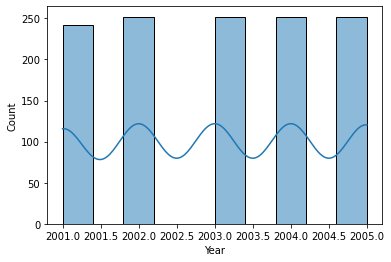

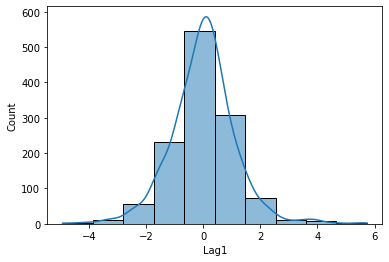

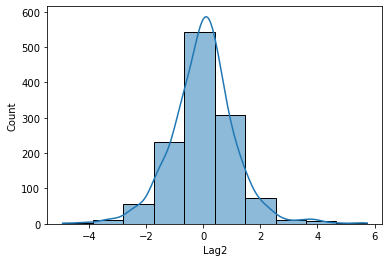

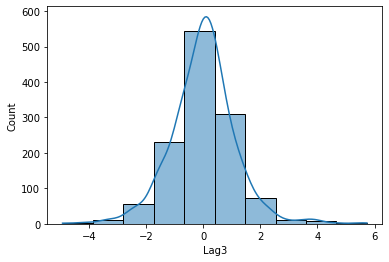

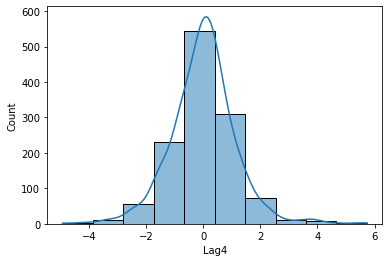

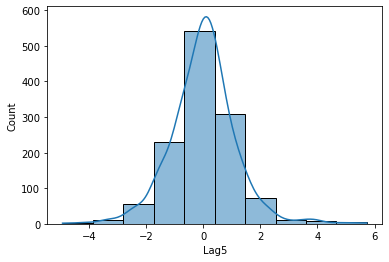

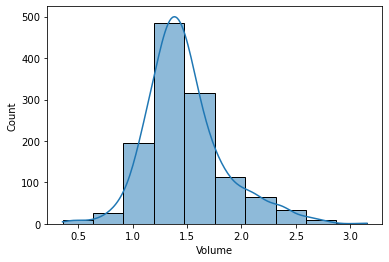

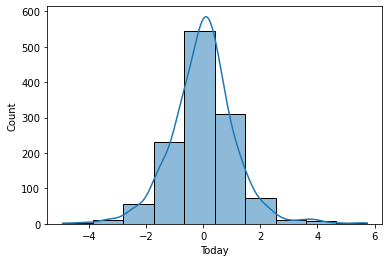

In [7]:
#Histogramas
df2 = df1.drop(['Direction'], axis=1)
for i, col in enumerate(df2.columns):
    plt.figure(i)
    sns.histplot(df2[col], bins=10, kde=True)

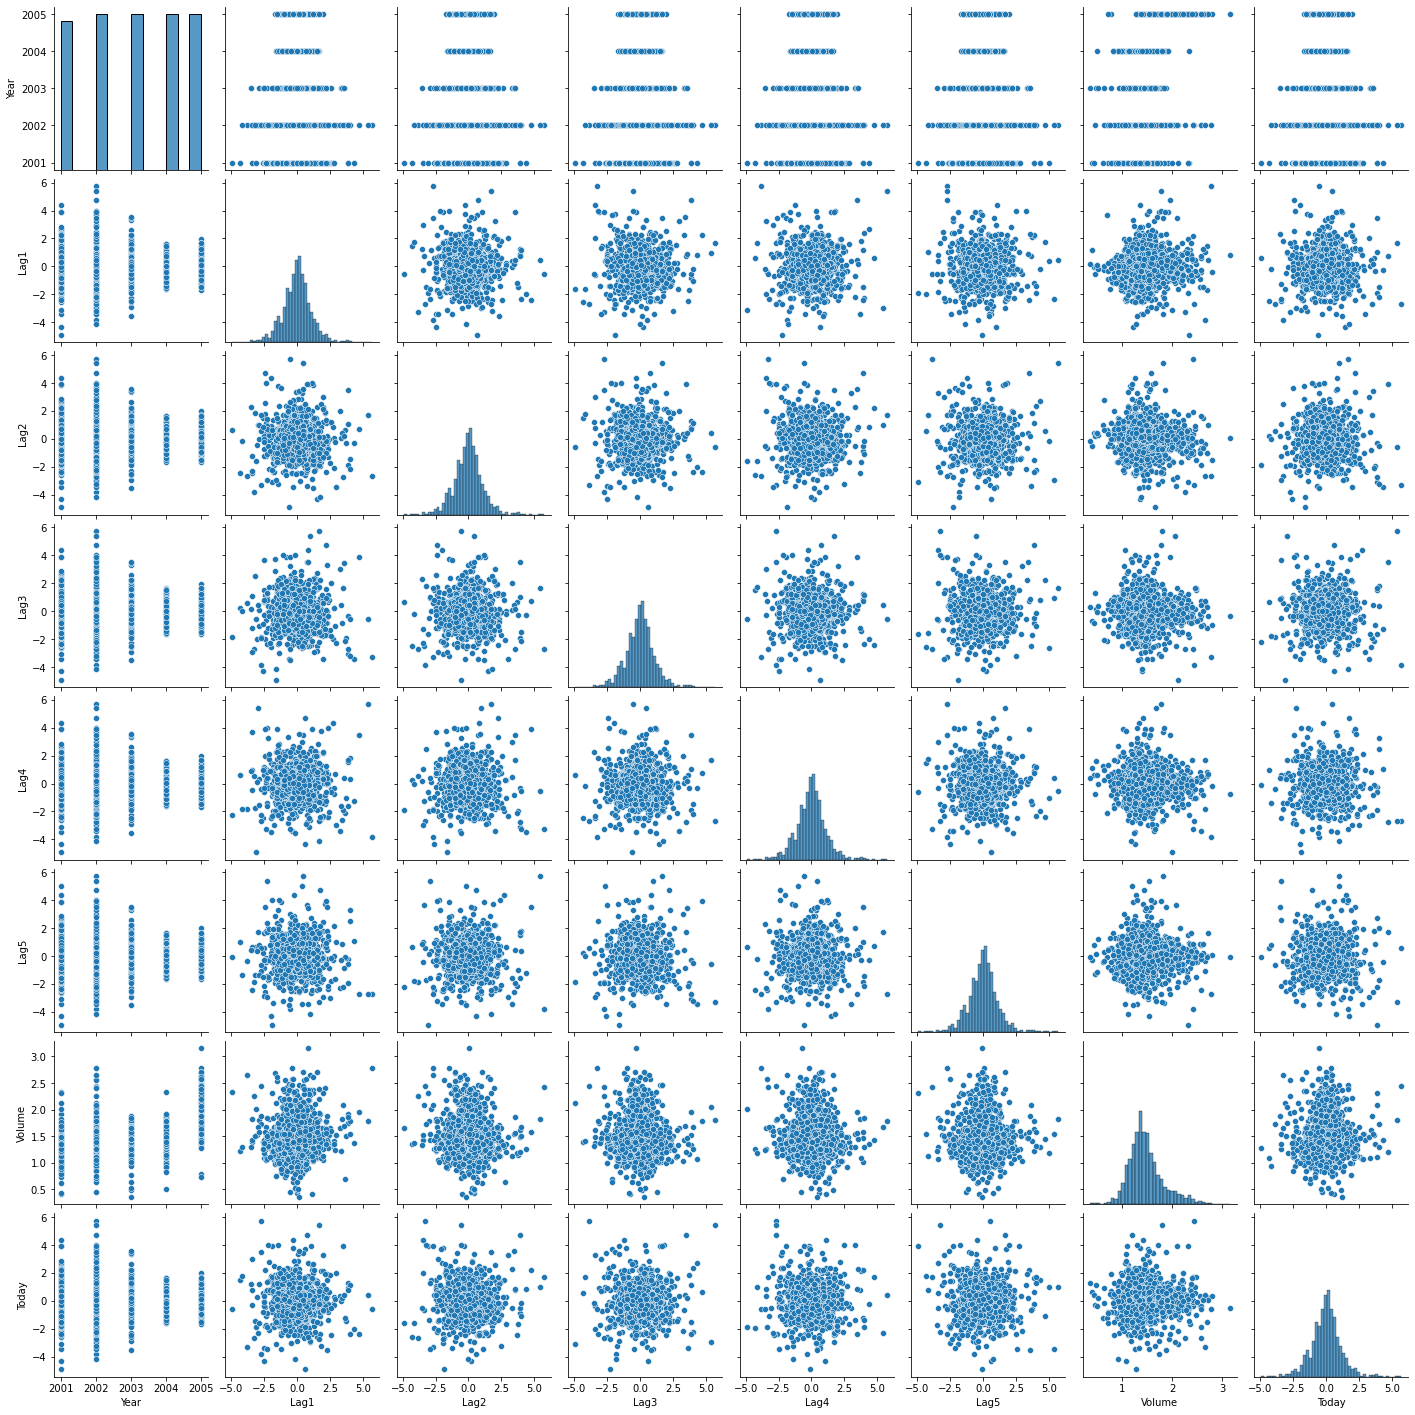

In [8]:
#Correlograma
sns.pairplot(df2, kind='scatter')
plt.show()

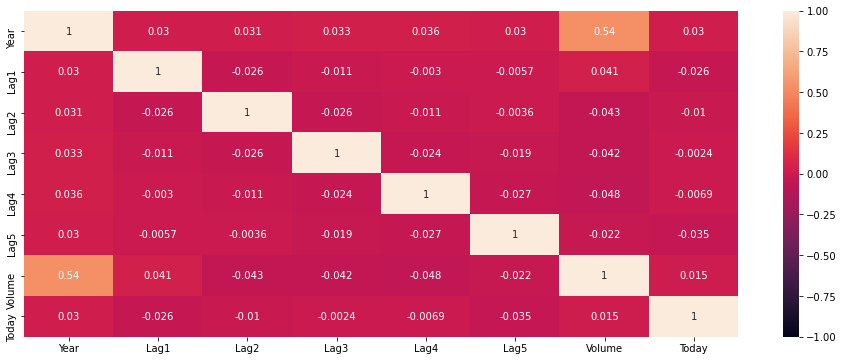

In [9]:
#Mapa de calor
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

#### Conclusiones punto 1

La base de datos para el ejercicio posee 8 variables en total. Contiene 1,250 observaciones y no hay datos faltantes.

Los histogramas y estadísticas nos muestran que la mayoría de todas las variables tienen una distribución normal. La variable Volumen tiene un leve sesgo hacia la izquierda.

El correlograma nos muestra que para todos los pares de variables la gráfica resultante son puntos dispersos, es decir, la correlación entre par de variables es muy débil por no decir nula. El par Year vs Volume muestra una correlación media.

Finalmente, se agrega un mapa de calor para mostrar la correlación numérica entre cada par de variables, donde se confirma lo descrito anteriormente.

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

Error de predicción:
0.055690072639225166

Matriz de confusión:
[[186  21]
 [  2 204]]

Accuracy:
0.9443099273607748

Precisión:
0.9066666666666666

Curva ROC y AUC:


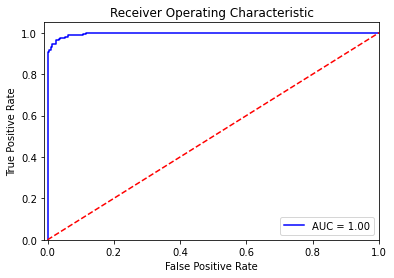

In [10]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

#Carga de datos
XTotal = df1.drop(['Direction'], axis = 1).to_numpy()
yTotal = df1['Direction'].map({'Up': 1, 'Down': 0}).astype(int).to_numpy()

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size = 0.33, random_state = 0)

#Estimación del modelo usando LDA
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(XTrain, yTrain)

prediccionesLDA = clfLDA.predict(XTest)
prediccionesProbLDA = clfLDA.predict_proba(XTest)

#Error de predicción
errorLDA = 0
for i in range(0, len(yTest)):
    if(yTest[i] != prediccionesLDA[i]):
        errorLDA += 1/len(yTest)
print('Error de predicción:')
print(errorLDA)
print('')

#Matriz de confusión
print('Matriz de confusión:')
print(confusion_matrix(y_true = yTest, y_pred = prediccionesLDA))
print('')

#Accuracy
print('Accuracy:')
accuracyLDA = accuracy_score(y_true = yTest, y_pred = prediccionesLDA)
print(accuracyLDA)
print('')

#Precisión
print('Precisión:')
precisionLDA = precision_score(y_true = yTest, y_pred = prediccionesLDA)
print(precisionLDA)
print('')

#Curva ROC y AUC
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbLDA[:, 1], pos_label = 1)
AUCLDA = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCLDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Conclusiones punto 2

Partiendo del supuesto de normalidad en la mayoría de los predictores, el modelo de clasificación es aplicable.

Consideramos el modelo un buen predictor pues reduce la cantidad de clasificaciones erróneas (sin diferenciar entre falsos positivos y falsos negativos). Lo anterior se fundamenta en un error de precisión de menos del 6%, precisión del 90% y niveles altos de sensibilidad y especificidad (curva ROC cercana a 1).

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

Error de predicción:
0.07263922518159803

Matriz de confusión:
[[185  22]
 [  8 198]]

Accuracy:
0.927360774818402

Precisión:
0.9

Curva ROC y AUC:


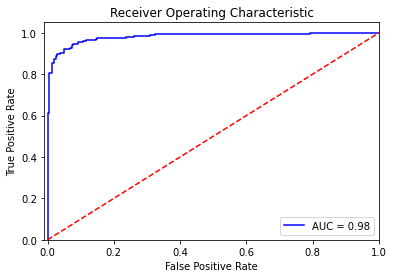

In [11]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

#Estimación del modelo usando QDA
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain, yTrain)

prediccionesQDA = clfQDA.predict(XTest)
prediccionesProbQDA = clfQDA.predict_proba(XTest)

#Error de predicción
errorQDA = 0
for i in range(0, len(yTest)):
    if(yTest[i] != prediccionesQDA[i]):
        errorQDA += 1/len(yTest)
print('Error de predicción:')
print(errorQDA)
print('')

#Matriz de confusión
print('Matriz de confusión:')
print(confusion_matrix(y_true = yTest, y_pred = prediccionesQDA))
print('')

#Accuracy
print('Accuracy:')
accuracyQDA = accuracy_score(y_true = yTest, y_pred = prediccionesQDA)
print(accuracyQDA)
print('')

#Precisión
print('Precisión:')
precisionQDA = precision_score(y_true = yTest, y_pred = prediccionesQDA)
print(precisionQDA)
print('')

#Curva ROC y AUC
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbQDA[:, 1], pos_label = 1)
AUCQDA = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCQDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Conclusiones punto 3

El desempeño del modelo es muy bueno para la muestra test utilizada. Para medir dicho desempeño se calcularon el error en la predicción, accuracy, precisión y AUC.

El error en la predicción es del 5% es decir que 21 de los 413 casos evaluados fueron incorrectos, lo cual nos parece muy bueno.

Las métricas de accuracy, precisión, curva ROC y AUC nos confirman que el modelo es bueno prediciendo. Creemos que esto se dede a que la muestra usada para evaluar el modelo es relativamente pequeña.

Si bien el modelo es bueno, respecto a los demás es el que menor desempeño muestra. Esto se lo atribuimos a que el supuesto de covarianzas no se cumple, es decir, la data que estamos usando para entrenar y evaluar el modelo tiene características que pueden aprovechar mejor los otros modelos, como por ejemplo LDA, donde el supuesto mencionado anteriormente, se cumple.

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

Error de predicción:
0.0460048426150121

Matriz de confusión:
[[190  17]
 [  2 204]]

Accuracy:
0.9539951573849879

Precisión:
0.9230769230769231

Curva ROC y AUC:


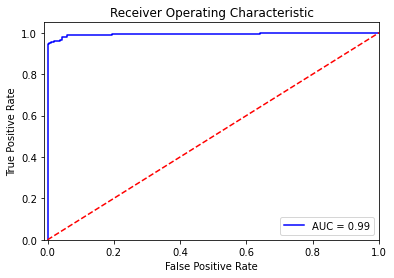

In [12]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

#Estimación del modelo usando NBC
clfNB = GaussianNB()
clfNB.fit(XTrain, yTrain)

prediccionesNB = clfNB.predict(XTest)
prediccionesProbNB = clfNB.predict_proba(XTest)

#Error de predicción
errorNB = 0
for i in range(0, len(yTest)):
    if(yTest[i] != prediccionesNB[i]):
        errorNB += 1/len(yTest)
print('Error de predicción:')
print(errorNB)
print('')

#Matriz de confusión
print('Matriz de confusión:')
print(confusion_matrix(y_true = yTest, y_pred = prediccionesNB))
print('')

#Accuracy
print('Accuracy:')
accuracyNBC = accuracy_score(y_true = yTest, y_pred = prediccionesNB)
print(accuracyNBC)
print('')

#Precisión
print('Precisión:')
precisionNBC = precision_score(y_true = yTest, y_pred = prediccionesNB)
print(precisionNBC)
print('')

#Curva ROC y AUC
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbNB[:, 1], pos_label = 1)
AUCNBC = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCNBC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Conclusiones punto 4

Como se observó en la tabla y gráficas de correlaciones, estas son bajas entre las variables, 
por lo que la suposición de "no dependencia" entre predictores se puede proponer y el método de Naive 
Bayes da buenos resultados.

El error de clasificación es de 0.046, lo que es bajo y habla bien del modelo. Por otro lado, el área
bajo la curva es de 0.99, mostrando un buen desempeño.

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

Error de predicción:
0.024213075060532694

Matriz de confusión:
[[199   8]
 [  2 204]]

Accuracy:
0.9757869249394673

Precisión:
0.9622641509433962

Curva ROC y AUC:


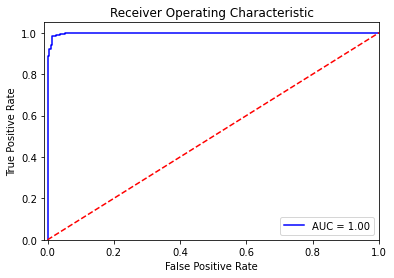

In [13]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

#Estimación del modelo usando regresión logística
clfRegLog = LogisticRegression(random_state = 0, max_iter = 10000)
clfRegLog.fit(XTrain, yTrain)

prediccionesRegLog = clfRegLog.predict(XTest)
prediccionesProbRegLog = clfRegLog.predict_proba(XTest)

#Error de predicción
errorRegLog = 0
for i in range(0, len(yTest)):
    if(yTest[i] != prediccionesRegLog[i]):
        errorRegLog += 1/len(yTest)
print('Error de predicción:')
print(errorRegLog)
print('')

#Matriz de confusión
print('Matriz de confusión:')
print(confusion_matrix(y_true = yTest, y_pred = prediccionesRegLog))
print('')

#Accuracy
print('Accuracy:')
accuracyRegLog = accuracy_score(y_true = yTest, y_pred = prediccionesRegLog)
print(accuracyRegLog)
print('')

#Precisión
print('Precisión:')
precisionRegLog = precision_score(y_true = yTest, y_pred = prediccionesRegLog)
print(precisionRegLog)
print('')

#Curva ROC y AUC
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbRegLog[:, 1], pos_label = 1)
AUCRegLog = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

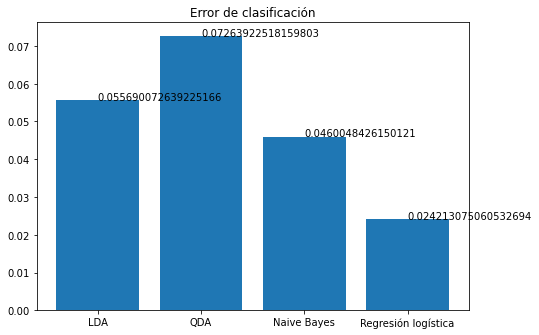

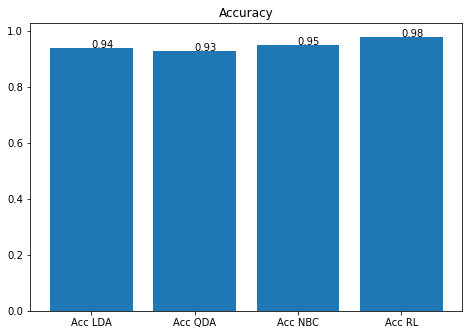

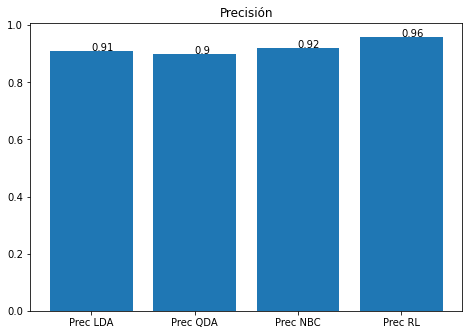

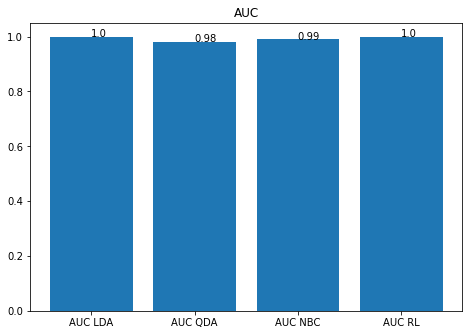

In [14]:
#Comparación del error de predicción
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Error de clasificación")
ejeX = ['LDA', 'QDA', 'Naive Bayes', 'Regresión logística']
ejeY = [errorLDA, errorQDA, errorNB, errorRegLog]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

#Comparación de accuracy
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Accuracy")
ejeX = ['Acc LDA', 'Acc QDA', 'Acc NBC', 'Acc RL']
ejeY = [round(accuracyLDA, 2), round(accuracyQDA, 2), round(accuracyNBC, 2), round(accuracyRegLog, 2)]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

#Comparación de precisión
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Precisión")
ejeX = ['Prec LDA', 'Prec QDA', 'Prec NBC', 'Prec RL']
ejeY = [round(precisionLDA, 2), round(precisionQDA, 2), round(precisionNBC, 2), round(precisionRegLog, 2)]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

#Comparación de AUC
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("AUC")
ejeX = ['AUC LDA', 'AUC QDA', 'AUC NBC', 'AUC RL']
ejeY = [round(AUCLDA, 2), round(AUCQDA, 2), round(AUCNBC, 2), round(AUCRegLog, 2)]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

#### Conclusiones punto 6

Como se observa en la primera gráfica (Error de clasificación), el modelo de Regresión Logística obtuvo el mejor desempeño, conclusión sustentada, también, en la Comparación de Precisión y AUC.

Es de esperar que el modelo de Regresión Logística tenga un mejor resultado toda vez que su clasificación se fundamente en la probabilidad de una observación de pertenecer a una clasificación según sus características o parámetros

Creemos que el modelo RL obtiene un mejor desempeño al resto (por muy poco) debido a varios factores; lo primero es que la cantidad de observaciones usadas para entrenar y evaluar es modelo es relativamente baja, lo segundo es que la cantidad de variables es baja también, es decir, son solo 8 variables predictoras. Esto va en línea con las características del modelo RL, el cual es el menos flexible de los 4, es decir, de tener que trabajar con un número de variables mayor, el desempeño de este modelo caería significativamente dado el aumento en la varianza de cada clase.

Influye importantemente en el desempeño del modelo RL el hecho que solo estemos considerando dos clases, es decir un problema de clasificación de tipo binario.

***
Draft:
Mientras que LDA asume distribución normal de los datos, QDA parte de diferencia en las covarianzas de los grupos y Naive Bayes asume independencia de los datos.